<h1><center><strong> "In the name of God"

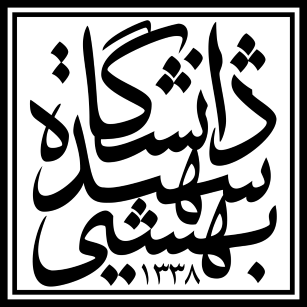


***
&#128300; **Subject** :

Brain Tumor Detection with TransferLearning

(VGG16, MobileNet, ResNet50, InceptionV3)


***
&#128100; **name** :  `Hossein jafari`

[ __Google Scholar__ | __[LinkedIn](https://www.linkedin.com/in/hossein-jafari2001/)__ | __[GitHub](https://github.com/HosseinJafari2001)__  ]                   

&#127380; **studential ID**  : `98242040`
***
&#128100; **Name** : `Nikoo Paknia`  
[ __Google Scholar__ | __[LinkedIn](https://www.linkedin.com/in/nikoo-paknia/)__ |  __GitHub__ ]           

&#127380; **Studential ID** : `98242029`
***
&#128100; **Name** : `Amir Hossein Soltanpour`

[ __Google Scholar__ | __LinkedIn__ | __[GitHub](https://github.com/AmirHossein-STP)__  ]            

&#127380; **Studential ID** : `96`
***

&#128100; **Lecturer** : `Dr. Arash Sadeghzadeh`

[ __[Google Scholar](https://scholar.google.com/citations?user=R0fIejYAAAAJ)__ | __[LinkedIn](https://www.linkedin.com/in/arash-sadeghzadeh-ba1930158/?originalSubdomain=nl)__ | __[GitHub](https://github.com/AraSadz)__  ]
***
&#128218; **references** :
<br>  __[kaggle](https://www.kaggle.com/)__
<br>  __[github](https://github.com/)__
<br>  __[stackoverflow](https://stackoverflow.com/)__   



***
# **0. Introduction**

In this notebook we will include different types of solutions for brain tumor detection.

The solutions are collected from different notebooks and refrences such as kaggle, github and stackoverflow.

As a learning process, We are collecting different solutions from different notebooks, trying to improve performace of the model and comparing the performance of the different model on this dataset.

We will use 4 models on this notebook, which are VGG19, MobileNetV3, ResNet50v2 and InceptionV3.

here is some files that may you need it :
1. [Brain Tumor Dataset](https://drive.google.com/drive/folders/1Du3I8vmKluIAIwIYZoA7YGmckBCQ3Qwq?usp=sharing)
2. [inception_model (Inception-V3 weight)](https://drive.google.com/file/d/1-15jYLYL6y8a_xqwkBsAfRMpTUEH64Bz/view?usp=sharing)
3. [mobile_model (MobileNet weight)](https://drive.google.com/file/d/1RtfuTwiu8iImS8XtQBqmM9-rTGDLc_PM/view?usp=sharing)
4. [resnet_model (ResNet50 weight)](https://drive.google.com/file/d/1-39YOSX5imdzQu8xHHOaXFT049bu4K39/view?usp=sharing)
5. [vgg_model (VGG16 weight)](https://drive.google.com/file/d/1Y9XM-av89qQVOC1olpEQWkdln7tX-3uH/view?usp=sharing)

## **0.1. Installing some important Library**

In [1]:
#pip install os-win

In [2]:
#pip install numpy

In [3]:
#pip install pandas

In [4]:
#pip install tensorflow

In [5]:
#pip install opencv-python

In [6]:
#pip install matplotlib

In [7]:
#pip install path

In [8]:
#pip install imutils

In [9]:
#pip install argparse

***
# **1. Step 1: Working with Dataset**



## **1.1. Importing the libraries**

In [10]:
# import libraries: These libraries are used in "loading" and "preprocessing" the data.
import os                                                                  # for linking to computer
import numpy as np                                                         # linear algebra (for data analysis)
import pandas as pd                                                        # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf                                                    # for building our models
import cv2                                                                 # for image processing
from PIL import Image
import matplotlib.pyplot as plt                                            # for data exploration
import matplotlib.image as mpimg
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

from imutils import paths
import argparse
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical                          # for building our models

## **1.2. Loading the data**

In [11]:
# load the data from google drive and connecting to common Gmail : project.sbu.ee@gmail.com
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# This line is already commeneted since the dataset is unzipped.
#!unzip -uq "/content/drive/MyDrive/ML project/Tumor Detection .zip" -d "/content/drive/MyDrive/ML project/tumor_detection"

In [13]:
#!gdown --id 10_zDxeipDnu_X_pbL-7L7YVV1LK517HK

In [14]:
# collecting dataset
path = "/content/drive/MyDrive/PATH_TO_OUTPUT/brain_tumor_dataset"
image_paths = list(paths.list_images(path))

## **1.3. Scaling the Images**

In [15]:
images_vgg = []
images_mobile = []
images_resnet = []
images_inception = []
labels = []

vgg_size = (224,224)
mobile_size = (224,224)
resnet_size = (224,224)
inception_size = (299,299)

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)

    image_vgg = cv2.resize(image, vgg_size)
    image_mobile = cv2.resize(image, mobile_size)
    image_resnet = cv2.resize(image, resnet_size)
    image_inception = cv2.resize(image, inception_size)

    images_vgg.append(image_vgg)
    images_mobile.append(image_mobile)
    images_resnet.append(image_resnet)
    images_inception.append(image_inception)
    labels.append(label)

In [16]:
print('total have tumor images:', len(os.listdir("/content/drive/MyDrive/PATH_TO_OUTPUT/brain_tumor_dataset/yes")))
print('total no tumor images:', len(os.listdir("/content/drive/MyDrive/PATH_TO_OUTPUT/brain_tumor_dataset/no")))

total have tumor images: 155
total no tumor images: 98


no


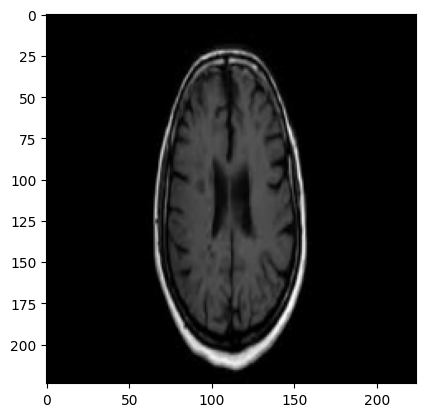

In [17]:
plt.imshow(images_vgg[0])
print(labels[0])

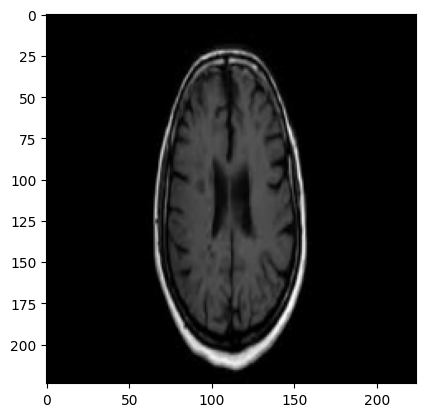

In [18]:
plt.imshow(images_mobile[0])

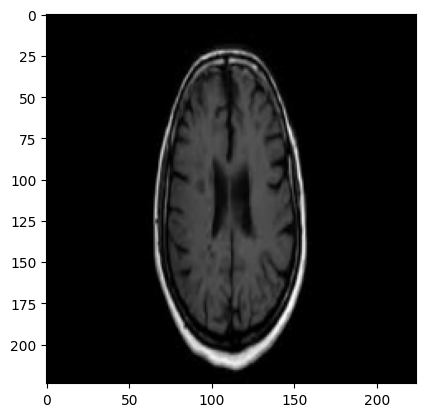

In [19]:
plt.imshow(images_resnet[0])

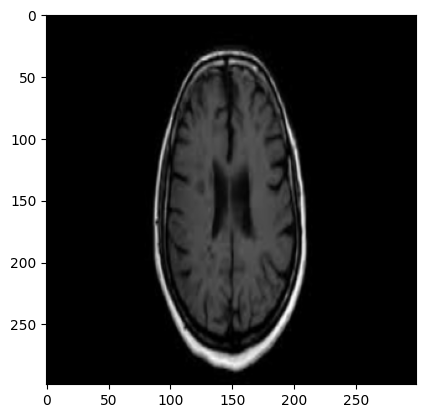

In [20]:
plt.imshow(images_inception[0])

## **1.4. Preprocessing the Data**

In [21]:
#preparing the data
images_vgg = np.array(images_vgg)
images_mobile = np.array(images_mobile)
images_resnet = np.array(images_vgg)
images_inception = np.array(images_vgg)
labels = np.array(labels)

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
#labels = to_categorical(labels)

In [22]:
#defining some preprocessing layers to be added in our model
def data_augmenter():
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip("horizontal"))
    data_augmentation.add(RandomRotation(0.2))
    return data_augmentation

def preprocess_data_vgg(X):
    X_p_vgg = tf.keras.applications.vgg16.preprocess_input(X)
    return X_p_vgg

def preprocess_data_mobile(X):
    X_p_vgg = tf.keras.applications.mobilenet_v3.preprocess_input(X)
    return X_p_vgg

def preprocess_data_resnet(X):
    X_p_vgg = tf.keras.applications.resnet50.preprocess_input(X)
    return X_p_vgg

def preprocess_data_inception(X):
    X_p_vgg = tf.keras.applications.inception_v3.preprocess_input(X)
    return X_p_vgg

## **1.5. Splitting Dataset**

In [23]:
#splitting dataset
from sklearn.model_selection import train_test_split
X_train_vgg,X_test_vgg,Y_train_vgg,Y_test_vgg = train_test_split(images_vgg,labels,test_size=0.05,random_state=True)
X_train_mobile,X_test_mobile,Y_train_mobile,Y_test_mobile = train_test_split(images_vgg,labels,test_size=0.05,random_state=True)
X_train_resnet,X_test_resnet,Y_train_resnet,Y_test_resnet = train_test_split(images_vgg,labels,test_size=0.05,random_state=True)
X_train_inception,X_test_inception,Y_train_inception,Y_test_inception = train_test_split(images_vgg,labels,test_size=0.05,random_state=True)
print(X_train_vgg.shape)
print(Y_train_vgg.shape)
print(X_test_vgg.shape)
print(Y_test_vgg.shape)

(240, 224, 224, 3)
(240, 1)
(13, 224, 224, 3)
(13, 1)


***
# **2. Step 2: Building all CNN models**

## **2.1. Building models**



In [24]:
#importing layers and backbones
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3

### **2.1.1. Building VGG16 Model**

In [25]:
#vgg16-based model
def vgg_model(X, augmentation=data_augmenter()):
    model_vgg = VGG16(include_top = False, weights ='imagenet', input_shape = X[0].shape)
    # Fine-tune from this layer onwards
    fine_tune_at = 14
    # Freeze all the layers before the `fine_tune_at` layer
    for layer in model_vgg.layers[:fine_tune_at]:
        layer.trainable = False

    inputs = tf.keras.Input(shape = X[0].shape)
    x = augmentation(inputs)
    x = preprocess_data_vgg(x)
    x = model_vgg(x)
    x = AveragePooling2D(pool_size = (4, 4))(x)
    x = Flatten(name = "flatten")(x)
    x = Dense(64, activation = "relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(8, activation = "relu")(x)
    outputs = Dense(1, activation = "sigmoid")(x)

    mod_vgg = tf.keras.Model(inputs, outputs)

    return mod_vgg


In [26]:
vgg_net = vgg_model(X_train_vgg, augmentation = data_augmenter())

58889256/58889256 [==============================] - 2s 0us/step


In [27]:
vgg_net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 average_pooling2d (AverageP  (None, 1, 1, 512)        0         
 ooling2D)                                                   

In [28]:
base_learning_rate = 0.0001
vgg_net.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
               loss = tf.keras.losses.BinaryCrossentropy(),
               metrics = ['accuracy'])#change other backbones and compare/diagrams/test set

### **2.1.2. Building MobilNet-V3 Model**

In [29]:
#mobilenet_v3-based model
def mobile_model(X, augmentation=data_augmenter()):
    model_mobile = MobileNetV3Small(include_top = False, weights = 'imagenet', input_shape = X[0].shape)
    # Fine-tune from this layer onwards
    fine_tune_at = 12
    # Freeze all the layers before the `fine_tune_at` layer
    for layer in model_mobile.layers[:fine_tune_at]:
        layer.trainable = False

    inputs = tf.keras.Input(shape = X[0].shape)
    x = augmentation(inputs)
    x = preprocess_data_mobile(x)
    x = model_mobile(x)
    x = Flatten(name = "flatten")(x)
    x = Dense(64, activation = "relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(8, activation = "relu")(x)
    outputs = Dense(1, activation = "sigmoid")(x)

    mod_mobile = tf.keras.Model(inputs, outputs)

    return mod_mobile

In [30]:
mobile_net = mobile_model(X_train_mobile, augmentation=data_augmenter())

4334752/4334752 [==============================] - 1s 0us/step


In [31]:
base_learning_rate = 0.0001
mobile_net.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = ['accuracy'])#change other backbones and compare/diagrams/test set

In [32]:
mobile_net.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                1806400   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                           

### **2.1.3. Building ResNet50 Model**

In [33]:
#resnet50-based model
def resnet_model(X, augmentation=data_augmenter()):
    model_resnet = ResNet50(include_top=False, weights='imagenet', input_shape=X[0].shape)
    # Fine-tune from this layer onwards
    fine_tune_at = 14
    # Freeze all the layers before the `fine_tune_at` layer
    for layer in model_resnet.layers[:fine_tune_at]:
        layer.trainable = False

    inputs = tf.keras.Input(shape=X[0].shape)
    x = augmentation(inputs)
    x = preprocess_data_mobile(x)
    x = model_resnet(x)
    x = Flatten(name="flatten")(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(8, activation="relu")(x)
    outputs = Dense(1, activation="sigmoid")(x)

    mod_resnet = tf.keras.Model(inputs, outputs)

    return mod_resnet

In [34]:
resnet_net = resnet_model(X_train_inception, augmentation=data_augmenter())

94765736/94765736 [==============================] - 4s 0us/step


In [35]:
base_learning_rate = 0.0001
resnet_net.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
                      loss = tf.keras.losses.BinaryCrossentropy(),
                      metrics = ['accuracy'])#change other backbones and compare/diagrams/test set

In [36]:
resnet_net.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_5 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                6422592   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 520 

### **2.1.4. Building Inception-V3 Model**

In [37]:
#inception_v3-based model
def inception_model(X, augmentation=data_augmenter()):
    model_inception = InceptionV3(include_top = False, weights = 'imagenet', input_shape = X[0].shape)
    # Fine-tune from this layer onwards
    fine_tune_at = 14
    # Freeze all the layers before the `fine_tune_at` layer
    for layer in model_inception.layers[:fine_tune_at]:
        layer.trainable = False

    inputs = tf.keras.Input(shape = X[0].shape)
    x = augmentation(inputs)
    x = preprocess_data_mobile(x)
    x = model_inception(x)
    x = Flatten(name = "flatten")(x)
    x = Dense(64, activation = "relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(8, activation = "relu")(x)
    outputs = Dense(1, activation = "sigmoid")(x)

    mod_inception = tf.keras.Model(inputs, outputs)

    return mod_inception

In [38]:
inception_net = inception_model(X_train_inception, augmentation = data_augmenter())

87910968/87910968 [==============================] - 4s 0us/step


In [39]:
base_learning_rate = 0.0001
inception_net.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics = ['accuracy'])#change other backbones and compare/diagrams/test set

In [40]:
inception_net.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_7 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                3276864   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 520 

***
# **3. Step 3: Train and Evaluate our model on the dataset**

## **3.1. Training different models**


### **3.1.1. Training VGG16 Model**

In [41]:
initial_epochs = 15
history_vgg = vgg_net.fit(X_train_vgg,Y_train_vgg, validation_data=(X_test_vgg,Y_test_vgg), epochs=initial_epochs)

Epoch 1/15
8/8 [==============================] - 195s 24s/step - loss: 1.2345 - accuracy: 0.5708 - val_loss: 0.6862 - val_accuracy: 0.4615
Epoch 2/15
8/8 [==============================] - 196s 25s/step - loss: 0.6326 - accuracy: 0.6417 - val_loss: 0.6367 - val_accuracy: 0.6154
Epoch 3/15
8/8 [==============================] - 194s 24s/step - loss: 0.6672 - accuracy: 0.6583 - val_loss: 0.6668 - val_accuracy: 0.6154
Epoch 4/15
8/8 [==============================] - 194s 24s/step - loss: 0.5905 - accuracy: 0.6750 - val_loss: 0.5365 - val_accuracy: 0.7692
Epoch 5/15
8/8 [==============================] - 197s 25s/step - loss: 0.5317 - accuracy: 0.7250 - val_loss: 0.5045 - val_accuracy: 0.7692
Epoch 6/15
8/8 [==============================] - 195s 25s/step - loss: 0.5107 - accuracy: 0.7625 - val_loss: 0.5589 - val_accuracy: 0.6923
Epoch 7/15
8/8 [==============================] - 194s 24s/step - loss: 0.4344 - accuracy: 0.7792 - val_loss: 0.5019 - val_accuracy: 0.7692
Epoch 8/15
8/8 [====

### **3.1.2. Training MobileNet - V3 Model**

In [42]:
initial_epochs = 15
history_mobile = mobile_net.fit(X_train_mobile,Y_train_mobile, validation_data=(X_test_mobile,Y_test_mobile), epochs=initial_epochs)

Epoch 1/15
8/8 [==============================] - 30s 2s/step - loss: 1.0384 - accuracy: 0.4958 - val_loss: 0.6065 - val_accuracy: 0.6923
Epoch 2/15
8/8 [==============================] - 13s 2s/step - loss: 0.6681 - accuracy: 0.6375 - val_loss: 0.6996 - val_accuracy: 0.3846
Epoch 3/15
8/8 [==============================] - 13s 2s/step - loss: 0.6767 - accuracy: 0.6625 - val_loss: 0.7272 - val_accuracy: 0.5385
Epoch 4/15
8/8 [==============================] - 12s 2s/step - loss: 0.5019 - accuracy: 0.7583 - val_loss: 0.6413 - val_accuracy: 0.4615
Epoch 5/15
8/8 [==============================] - 11s 1s/step - loss: 0.4728 - accuracy: 0.7792 - val_loss: 0.5664 - val_accuracy: 0.6154
Epoch 6/15
8/8 [==============================] - 13s 1s/step - loss: 0.4129 - accuracy: 0.8042 - val_loss: 0.5477 - val_accuracy: 0.6154
Epoch 7/15
8/8 [==============================] - 13s 2s/step - loss: 0.4094 - accuracy: 0.8250 - val_loss: 0.5127 - val_accuracy: 0.6923
Epoch 8/15
8/8 [==================

### **3.1.3. Training ResNet50 Model**

In [43]:
initial_epochs = 15
history_resnet = resnet_net.fit(X_train_resnet,Y_train_resnet, validation_data=(X_test_resnet,Y_test_resnet), epochs=initial_epochs)

Epoch 1/15
8/8 [==============================] - 207s 23s/step - loss: 0.8866 - accuracy: 0.5792 - val_loss: 0.6744 - val_accuracy: 0.5385
Epoch 2/15
8/8 [==============================] - 185s 23s/step - loss: 0.5776 - accuracy: 0.7250 - val_loss: 0.4766 - val_accuracy: 0.7692
Epoch 3/15
8/8 [==============================] - 182s 23s/step - loss: 0.6150 - accuracy: 0.6833 - val_loss: 0.6317 - val_accuracy: 0.5385
Epoch 4/15
8/8 [==============================] - 184s 23s/step - loss: 0.4343 - accuracy: 0.7917 - val_loss: 0.4506 - val_accuracy: 0.6923
Epoch 5/15
8/8 [==============================] - 181s 23s/step - loss: 0.3855 - accuracy: 0.8792 - val_loss: 0.7721 - val_accuracy: 0.6923
Epoch 6/15
8/8 [==============================] - 185s 23s/step - loss: 0.2333 - accuracy: 0.9208 - val_loss: 0.7632 - val_accuracy: 0.6923
Epoch 7/15
8/8 [==============================] - 185s 23s/step - loss: 0.1520 - accuracy: 0.9250 - val_loss: 0.8422 - val_accuracy: 0.7692
Epoch 8/15
8/8 [====

### **3.1.4. Training Inception - V3 Model**

In [44]:
initial_epochs = 15
history_inception = inception_net.fit(X_train_inception,Y_train_inception, validation_data=(X_test_inception,Y_test_inception), epochs=initial_epochs)

Epoch 1/15
8/8 [==============================] - 135s 14s/step - loss: 0.7483 - accuracy: 0.5667 - val_loss: 0.6333 - val_accuracy: 0.5385
Epoch 2/15
8/8 [==============================] - 112s 14s/step - loss: 0.5775 - accuracy: 0.7292 - val_loss: 0.6511 - val_accuracy: 0.6923
Epoch 3/15
8/8 [==============================] - 111s 14s/step - loss: 0.5114 - accuracy: 0.7625 - val_loss: 0.6727 - val_accuracy: 0.7692
Epoch 4/15
8/8 [==============================] - 113s 14s/step - loss: 0.3755 - accuracy: 0.8167 - val_loss: 0.8391 - val_accuracy: 0.6923
Epoch 5/15
8/8 [==============================] - 113s 14s/step - loss: 0.3295 - accuracy: 0.8708 - val_loss: 0.8249 - val_accuracy: 0.7692
Epoch 6/15
8/8 [==============================] - 114s 14s/step - loss: 0.2802 - accuracy: 0.8875 - val_loss: 1.5326 - val_accuracy: 0.6923
Epoch 7/15
8/8 [==============================] - 113s 14s/step - loss: 0.1961 - accuracy: 0.9333 - val_loss: 1.0112 - val_accuracy: 0.7692
Epoch 8/15
8/8 [====

***
# **4. Step 4: Conclusion**

## **4.1. Visualizing and comparing the performance of models**

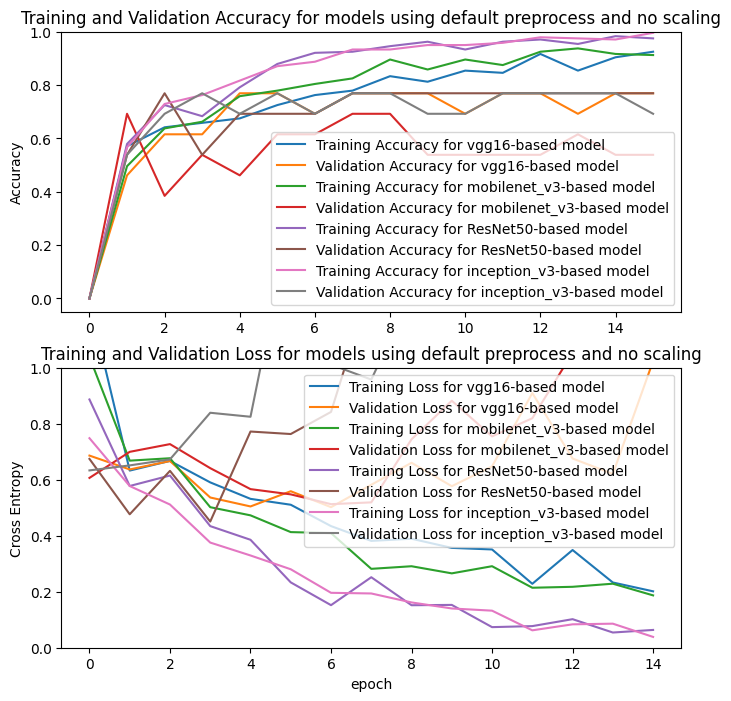

In [45]:
acc_vgg = [0.] + history_vgg.history['accuracy']
val_acc_vgg = [0.] + history_vgg.history['val_accuracy']
acc_mobile = [0.] + history_mobile.history['accuracy']
val_acc_mobile = [0.] + history_mobile.history['val_accuracy']
acc_resnet = [0.] + history_resnet.history['accuracy']
val_acc_resnet = [0.] + history_resnet.history['val_accuracy']
acc_inception = [0.] + history_inception.history['accuracy']
val_acc_inception = [0.] + history_inception.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_vgg, label='Training Accuracy for vgg16-based model')
plt.plot(val_acc_vgg, label='Validation Accuracy for vgg16-based model')
plt.plot(acc_mobile, label='Training Accuracy for mobilenet_v3-based model')
plt.plot(val_acc_mobile, label='Validation Accuracy for mobilenet_v3-based model')
plt.plot(acc_resnet, label='Training Accuracy for ResNet50-based model')
plt.plot(val_acc_resnet, label='Validation Accuracy for ResNet50-based model')
plt.plot(acc_inception, label='Training Accuracy for inception_v3-based model')
plt.plot(val_acc_inception, label='Validation Accuracy for inception_v3-based model')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy for models using default preprocess and no scaling')


loss_vgg = history_vgg.history['loss']
val_loss_vgg = history_vgg.history['val_loss']
loss_mobile = history_mobile.history['loss']
val_loss_mobile = history_mobile.history['val_loss']
loss_resnet = history_resnet.history['loss']
val_loss_resnet = history_resnet.history['val_loss']
loss_inception = history_inception.history['loss']
val_loss_inception = history_inception.history['val_loss']

plt.subplot(2, 1, 2)
plt.plot(loss_vgg, label='Training Loss for vgg16-based model')
plt.plot(val_loss_vgg, label='Validation Loss for vgg16-based model')
plt.plot(loss_mobile, label='Training Loss for mobilenet_v3-based model')
plt.plot(val_loss_mobile, label='Validation Loss for mobilenet_v3-based model')
plt.plot(loss_resnet, label='Training Loss for ResNet50-based model')
plt.plot(val_loss_resnet, label='Validation Loss for ResNet50-based model')
plt.plot(loss_inception, label='Training Loss for inception_v3-based model')
plt.plot(val_loss_inception, label='Validation Loss for inception_v3-based model')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss for models using default preprocess and no scaling')
plt.xlabel('epoch')
plt.show()

## **4.2. saving the models**

In [46]:
vgg_net.save("/content/drive/MyDrive/ML project/saved_model/vgg_model.h5")
mobile_net.save("/content/drive/MyDrive/ML project/saved_model/mobile_model.h5")
resnet_net.save("/content/drive/MyDrive/ML project/saved_model/resnet_model.h5")
inception_net.save("/content/drive/MyDrive/ML project/saved_model/inception_model.h5")

***
# **5. Step 5: Testing**

## **5.1. loading the models for prediction**

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **5.2. Downloading the weights which We made It in this Code**

In [48]:
#In this part we will perform our models on some "has tumor" and "doesn't have tumor" images
#and see if they predict well enough
import tensorflow as tf
new_vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/ML project/saved_model/vgg_model.h5')
new_mobile_model = tf.keras.models.load_model('/content/drive/MyDrive/ML project/saved_model/mobile_model.h5')
new_resnet_model = tf.keras.models.load_model('/content/drive/MyDrive/ML project/saved_model/resnet_model.h5')
new_inception_model = tf.keras.models.load_model('/content/drive/MyDrive/ML project/saved_model/inception_model.h5')
new_mobile_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                1806400   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                           

## **5.3. Trying the models on an image from net**



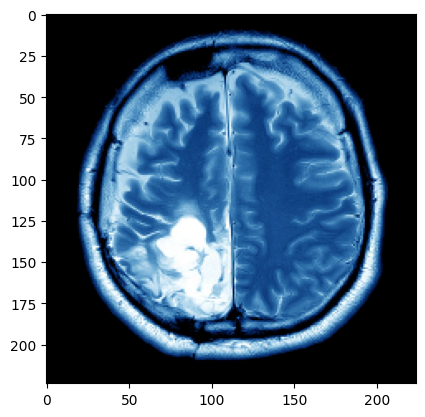

In [60]:
import matplotlib.pyplot as plt
image_url = tf.keras.utils.get_file('Court', origin='https://content.health.harvard.edu/wp-content/uploads/2023/03/3c7b18a8-c266-455c-b552-dd660d9fac50.jpg' )
img = tf.keras.preprocessing.image.load_img(image_url, target_size=( 224, 224 ) )

plt.imshow(img)


In [50]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
print(img_array.shape)

(224, 224, 3)


In [58]:
import numpy as np
print(new_vgg_model.predict(np.expand_dims(img, axis=0)))
print(new_mobile_model.predict(np.expand_dims(img, axis=0)))
print(new_resnet_model.predict(np.expand_dims(img, axis=0)))
print(new_inception_model.predict(np.expand_dims(img, axis=0)))


1/1 [==============================] - 2s 2s/step
[[0.99586535]]
1/1 [==============================] - 0s 190ms/step
[[0.98891956]]
1/1 [==============================] - 1s 547ms/step
[[1.]]
1/1 [==============================] - 3s 3s/step
[[0.9997109]]


## **5.4. Trying the models on one of the images in our dataset**

In [59]:
# title
import cv2
img2=cv2.imread("/content/drive/MyDrive/PATH_TO_OUTPUT/brain_tumor_dataset/yes/Y105.jpg")
img_2 = cv2.resize(img2, (224,224))
print(new_vgg_model.predict(np.expand_dims(img_2, axis=0)))
print(new_mobile_model.predict(np.expand_dims(img_2, axis=0)))
print(new_resnet_model.predict(np.expand_dims(img_2, axis=0)))
print(new_inception_model.predict(np.expand_dims(img_2, axis=0)))


1/1 [==============================] - 1s 551ms/step
[[0.99999213]]
1/1 [==============================] - 0s 40ms/step
[[0.9382329]]
1/1 [==============================] - 0s 219ms/step
[[1.]]
1/1 [==============================] - 0s 167ms/step
[[0.99998945]]
